In [74]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from dataset import MonuSegDataSet
from Sampler import DinoPoweredSampler
import matplotlib.pyplot as plt
from auxilary.utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import gaussian_kde
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import Normalizer

In [3]:
config = readConfig("config.sys")
config["reUseFeatures"] = True

In [4]:
'''trainPaths = config["trainDataset"]
sampleTrainImages = load_images(trainPaths)
dino_model = load_sampling_model(modelType="giga")
train_dataset = MonuSegDataSet(config["trainDataset"])'''

'trainPaths = config["trainDataset"]\nsampleTrainImages = load_images(trainPaths)\ndino_model = load_sampling_model(modelType="giga")\ntrain_dataset = MonuSegDataSet(config["trainDataset"])'

In [5]:
def apply_tsne(features):
    tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
    image_patches_tsne = tsne.fit_transform(features)
    return image_patches_tsne

def apply_dbscan(image_patches_tsne, eps = 5, min_samples = 5, metrics = 'cosine', gen_plot = False, mode = "sampletest"):
    imagePatches = image_patches_tsne
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metrics)
    clusters = dbscan.fit_predict(imagePatches)
    print("Unique clusters:", np.unique(clusters))  # You should see more than just -1

    if not gen_plot:
        return clusters
        
    # Plot the results
    plt.figure(figsize=(10, 10))

    # Scatter plot for each uniquely labeled cluster
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        x = imagePatches[clusters == cluster][:, 0]
        y = imagePatches[clusters == cluster][:, 1]
        plt.scatter(x, y, label=f"Cluster {cluster}")

    plt.title("DBSCAN Clustering")
    plt.xlabel("1st component")
    plt.ylabel("2nd component")
    plt.legend()
    createDir(["Outputs/Plots/"])
        
    plt.savefig("Outputs/Plots/"+mode+"-dbscan.png")
            
    return clusters

In [6]:
features = np.load("Outputs/Features/debug-features.npy")

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [40]:
normalizer = Normalizer(norm='l2')
normalized_features = normalizer.fit_transform(scaled_features)

In [ ]:
print("tSNE")
image_patches_tsne = apply_tsne(scaled_features)

tSNE


DBSCAN
Unique clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Directory Outputs/Plots/ already exists


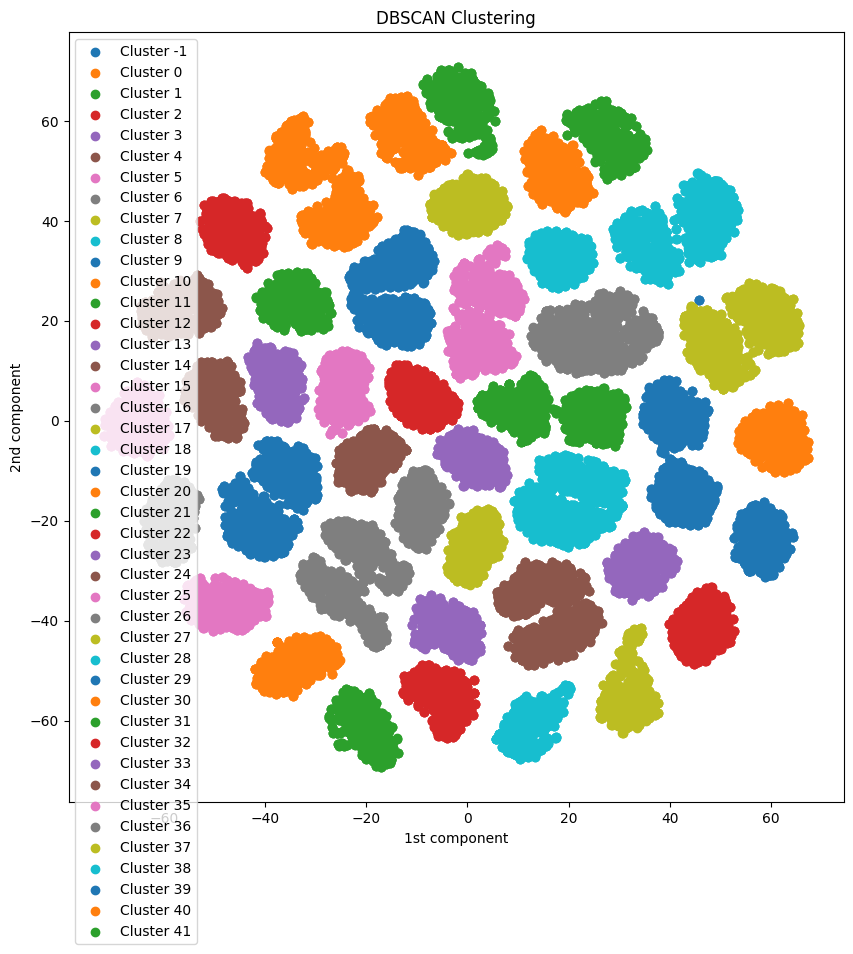

In [7]:
print("DBSCAN")
clusters = apply_dbscan(image_patches_tsne, eps=2, gen_plot=True)

In [103]:
def show_cluster_distribution(clusters):
    unique, counts = np.unique(clusters, return_counts=True)
    cluster_distribution = dict(zip(unique, counts))
    
    # Sort the clusters by their counts
    sorted_clusters = sorted(cluster_distribution.items(), key=lambda x: x[1], reverse=True)
    
    for cluster, count in sorted_clusters:
        print(f"Cluster {cluster}: {count} images")

In [112]:
print("Cluster Distribution:")
show_cluster_distribution(clusters)

Cluster Distribution:
Cluster 0: 1584 images
Cluster 1: 1584 images
Cluster 4: 1584 images
Cluster 14: 1584 images
Cluster 15: 1584 images
Cluster 16: 1584 images
Cluster 17: 1584 images
Cluster 26: 1584 images
Cluster 33: 1584 images
Cluster 34: 1584 images
Cluster 39: 1584 images
Cluster 7: 1581 images
Cluster 29: 1575 images
Cluster 37: 852 images
Cluster 20: 837 images
Cluster 9: 825 images
Cluster 24: 822 images
Cluster 27: 819 images
Cluster 19: 813 images
Cluster 31: 810 images
Cluster 10: 807 images
Cluster 13: 807 images
Cluster 22: 798 images
Cluster 2: 795 images
Cluster 5: 795 images
Cluster 35: 795 images
Cluster 40: 792 images
Cluster 3: 789 images
Cluster 6: 789 images
Cluster 36: 789 images
Cluster 23: 786 images
Cluster 41: 786 images
Cluster 11: 777 images
Cluster 12: 777 images
Cluster 32: 774 images
Cluster 18: 771 images
Cluster 28: 765 images
Cluster 25: 762 images
Cluster 8: 759 images
Cluster 21: 747 images
Cluster 38: 732 images
Cluster -1: 9 images
Cluster 30:

: 

In [107]:
def view_tsne(features, clusters, apply_tsne = False):
    if apply_tsne:
        tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
        patches_tsne = tsne.fit_transform(features)
        image_patches_tsne = patches_tsne
    else:
        image_patches_tsne = features
    # Plot the results
    plt.figure(1)
    # Use a colormap that provides distinct colors for each cluster
    colormap = plt.cm.get_cmap('tab20', len(np.unique(clusters)))  # 'tab20' has 20 distinct colors
    plt.scatter(image_patches_tsne[:, 0], image_patches_tsne[:, 1], c=clusters, cmap=colormap)
    plt.colorbar()
    plt.title(f"t-SNE Visualization, DBSCAN clusters - {len(np.unique(clusters))}")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()
    plt.clf()
    return image_patches_tsne

In [9]:
pca_dim = 20
pca = PCA(n_components=pca_dim)
pca.fit(features)
transformed_features = pca.transform(scaled_features)

In [53]:
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
patches_tsne = tsne.fit_transform(normalized_features)

In [110]:
print("DBSCAN")
clusters = apply_dbscan(patches_tsne, eps=2, min_samples=5, metrics='euclidean', gen_plot=False)

DBSCAN
Unique clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


tSNE


/tmp/ipykernel_23058/1514147044.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len(np.unique(clusters)))  # 'tab20' has 20 distinct colors


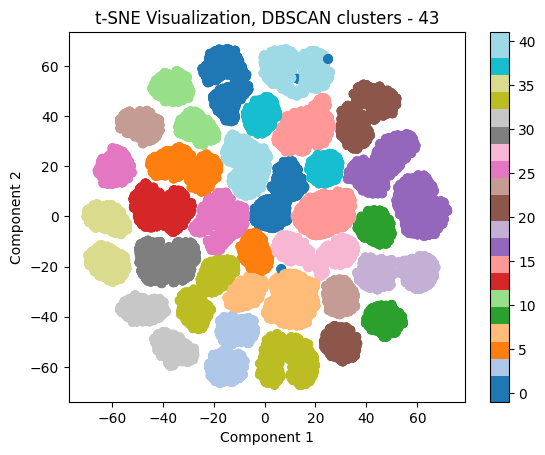

<Figure size 640x480 with 0 Axes>

In [111]:
print("tSNE")
image_patches_tsne = view_tsne(patches_tsne, clusters, apply_tsne=False)

In [15]:
sine_patches = cosine_similarity(image_patches_tsne)

In [9]:

def apply_dbscan(image_patches_tsne, eps = 5, min_samples = 5, gen_plot = False, mode = "sampletest"):
    imagePatches = image_patches_tsne
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    clusters = dbscan.fit_predict(imagePatches)
    print("Unique clusters:", np.unique(clusters))  # You should see more than just -1

    if not gen_plot:
        return clusters
        
    # Plot the results
    plt.figure(figsize=(10, 10))

    # Scatter plot for each uniquely labeled cluster
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        x = imagePatches[clusters == cluster][:, 0]
        y = imagePatches[clusters == cluster][:, 1]
        plt.scatter(x, y, label=f"Cluster {cluster}")

    plt.title("DBSCAN Clustering")
    plt.xlabel("1st component")
    plt.ylabel("2nd component")
    plt.legend()
    createDir(["Outputs/Plots/"])
        
    plt.savefig("Outputs/Plots/"+mode+"-dbscan.png")
            
    return clusters

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(transformed_features)

#cosine_distance = 1 - cosine_sim
cosine_distance = np.clip(1 - cosine_sim, 0, 2)

In [11]:
print("DBSCAN")
clusters = apply_dbscan(cosine_distance, eps=5)

DBSCAN


: 

In [ ]:
image_patches_tsne = apply_tsne(transformed_features, clusters)